# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [12]:
df = pd.read_csv('../data/states_edu.csv') 
df.head()
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [8]:

df.rename({
    'GRADES_PK_G':'ENROLL_PREK', 
    'GRADES_KG_G':'ENROLL KINDER', 
    'GRADES_4_G':'ENROLL_4', 
    'GRADES_8_G':'ENROLL_8', 
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY', 
    'GRADES_9_12_G':'ENROLL_HS', 
    'GRADES_ALL_G':'ENROLL_ALL', 
    'ENROLL':'ENROLL_ALL_EST'
    }, 
    axis=1, inplace=True)


<h2>Exploratory Data Analysis (EDA) </h2>

How many years of data are logged in our dataset? 

In [27]:
df.groupby('YEAR')["AVG_MATH_8_SCORE"].count()
print("13 years of data") 

13 years of data


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

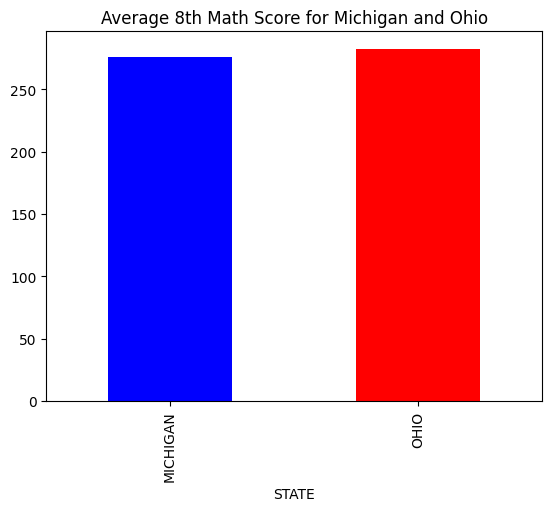

It is shown that Ohio has a higher average of 8th grade math score than Michigan


In [26]:
df_ = df[df['STATE'].isin(['MICHIGAN','OHIO'])][['STATE','AVG_MATH_8_SCORE']].dropna()
compare_ = df_.groupby('STATE')['AVG_MATH_8_SCORE'].mean()
compare_.plot(kind='bar', color=['blue', 'red'])
plt.title('Average 8th Math Score for Michigan and Ohio')
plt.show()
print("It is shown that Ohio has a higher average of 8th grade math score than Michigan")

Find the average for your chosen test across all states in 2019

In [31]:
df_2019 = df[df['YEAR'] == 2019][['STATE', 'AVG_MATH_8_SCORE']].dropna()
avg_all_states_2019 = df_2019['AVG_MATH_8_SCORE'].mean()
print(f"Average 8th Grade Math Score across all states is in 2019 is {avg_all_states_2019:.2f}.") 

Average 8th Grade Math Score across all states is in 2019 is 281.26.


For each state, find a maximum value for your chosen test score

In [35]:
df.groupby('STATE')['AVG_MATH_8_SCORE'].max().dropna()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [39]:
df['PER_STUDENT_EXPENDITURE'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL']
# Understanding the resources allocated to each student 
df[['STATE', 'AVG_MATH_8_SCORE', 'PER_STUDENT_EXPENDITURE', 'ENROLL']].dropna()
#Gain insight into quality of resources per student and the scale of the educational challenge

,STATE,AVG_MATH_8_SCORE,PER_STUDENT_EXPENDITURE,ENROLL
408,ALABAMA,264.0,3.494616,730184.0
410,ARIZONA,269.0,3.054628,814807.0
411,ARKANSAS,257.0,3.397068,450751.0
412,CALIFORNIA,260.0,3.957355,5941946.0
414,CONNECTICUT,281.0,6.013095,530363.0
...,...,...,...,...
1219,VIRGINIA,288.0,6.841255,1279867.0
1220,WASHINGTON,287.0,6.069762,1072359.0
1221,WEST_VIRGINIA,271.0,6.509767,279565.0
1222,WISCONSIN,289.0,6.641202,861813.0


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

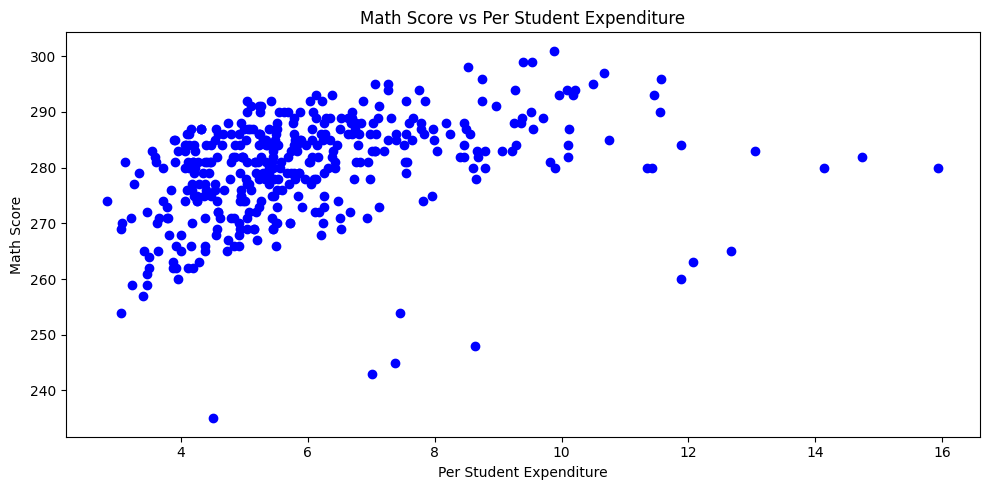

In [48]:

plt.figure(figsize=(10, 5))

plt.scatter(df['PER_STUDENT_EXPENDITURE'], df['AVG_MATH_8_SCORE'], color='blue')
plt.title('Math Score vs Per Student Expenditure')
plt.xlabel('Per Student Expenditure')
plt.ylabel('Math Score')

plt.tight_layout()
plt.show()


**<More resoures allocated to student doesn't result in higher math score, but could prevent low scores significantly>** 

**Visualization 2**

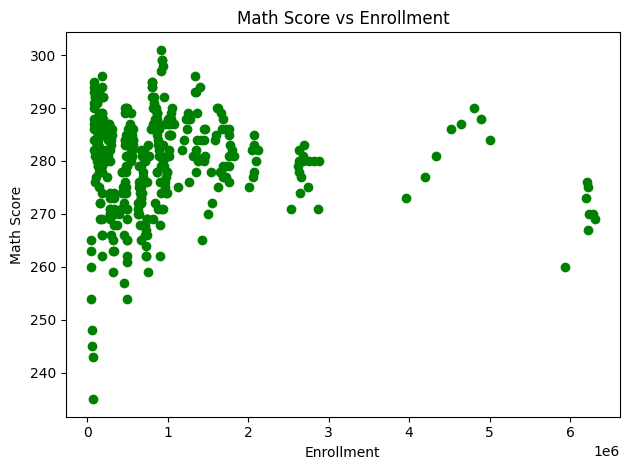

In [49]:
plt.scatter(df_selected['ENROLL'], df_selected['AVG_MATH_8_SCORE'], color='green')
plt.title('Math Score vs Enrollment')
plt.xlabel('Enrollment')
plt.ylabel('Math Score')

plt.tight_layout()
plt.show()

**<The less enrollment, the better score students get in math. However, a large enrollment scale doesn't result in students getting bad grades in math but maintaining an average level.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [82]:

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [83]:
df_cleaned = df[['PER_STUDENT_EXPENDITURE', 'ENROLL', 'AVG_MATH_8_SCORE']].dropna()
X = df[['PER_STUDENT_EXPENDITURE', 'ENROLL']]
y = df['AVG_MATH_8_SCORE']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y.fillna(y.median(), inplace=True)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size = 0.2, random_state = 42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [85]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [86]:
# create your model here
model = LinearRegression()

In [87]:
model.fit(X_train, y_train)

LinearRegression()

In [88]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

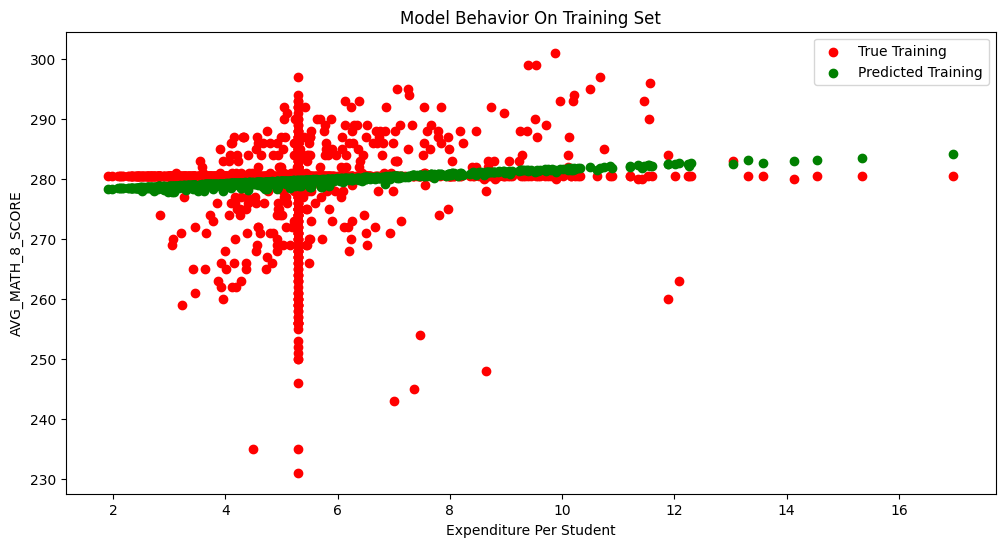

In [96]:
col_name = 'Expenditure Per Student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[:, 0], y_train, color = "red")
plt.scatter(X_train[:, 0], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

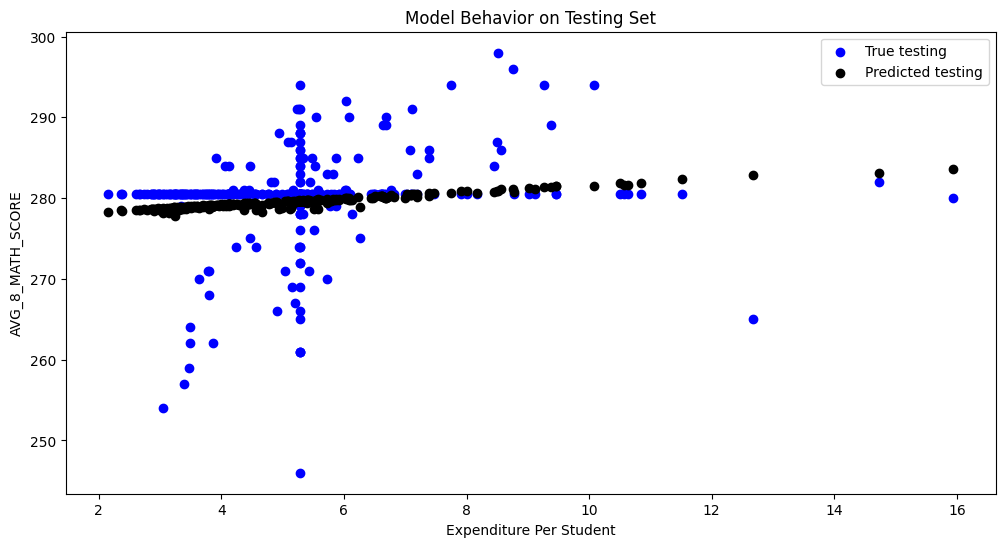

In [97]:
col_name = 'Expenditure Per Student' 

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[:, 0], y_test, color = "blue")
plt.scatter(X_test[:, 0], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_8_MATH_SCORE')
plt.title("Model Behavior on Testing Set")